In [1]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\DELL\Desktop\MINOR PROJECT\ARP Poison,flood attack Dataset.csv")
print(df)


        switch_id  in_port     outport  src_mac_addr(eth)  src_mac_addr(arp)  \
0               5        1  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
1               2        3  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
2               4        4  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
3               3        4  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
4               1        1  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
...           ...      ...         ...                ...                ...   
133995          2        1  4294967291  52:a8:8f:d6:f1:c5  f1:c7:f5:b5:82:57   
133996         11        4  4294967291  53:aa:b3:59:5b:9d  3e:22:e6:34:53:79   
133997         13        4  4294967291  71:12:2d:65:56:f1  da:4c:4a:76:d8:db   
133998         12        4  4294967291  71:12:2d:65:56:f1  da:4c:4a:76:d8:db   
133999          9        4  4294967291  a4:e8:f6:49:e4:7a  d0:55:d4:1b:a7:16   

        dst_mac_addr(eth)  dst_mac_addr

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134000 entries, 0 to 133999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   switch_id          134000 non-null  int64  
 1   in_port            134000 non-null  int64  
 2   outport            134000 non-null  int64  
 3   src_mac_addr(eth)  134000 non-null  object 
 4   src_mac_addr(arp)  133468 non-null  object 
 5   dst_mac_addr(eth)  134000 non-null  object 
 6   dst_mac_addr(arp)  133467 non-null  object 
 7   src_ip(arp)        134000 non-null  object 
 8   dst_ip(arp)        134000 non-null  object 
 9   op_code(arp)       134000 non-null  int64  
 10  packet_in_count    134000 non-null  int64  
 11  Protocol           134000 non-null  int64  
 12  Pkt loss           134000 non-null  int64  
 13  rtt (avg)          134000 non-null  float64
 14  total_time         134000 non-null  int64  
 15  Label              134000 non-null  int64  
dtypes:

In [3]:
df.isnull().sum()

switch_id              0
in_port                0
outport                0
src_mac_addr(eth)      0
src_mac_addr(arp)    532
dst_mac_addr(eth)      0
dst_mac_addr(arp)    533
src_ip(arp)            0
dst_ip(arp)            0
op_code(arp)           0
packet_in_count        0
Protocol               0
Pkt loss               0
rtt (avg)              0
total_time             0
Label                  0
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

switch_id            0
in_port              0
outport              0
src_mac_addr(eth)    0
src_mac_addr(arp)    0
dst_mac_addr(eth)    0
dst_mac_addr(arp)    0
src_ip(arp)          0
dst_ip(arp)          0
op_code(arp)         0
packet_in_count      0
Protocol             0
Pkt loss             0
rtt (avg)            0
total_time           0
Label                0
dtype: int64

In [5]:
for i in df.columns:
  print(i,len(df[i].unique()))

switch_id 13
in_port 4
outport 5
src_mac_addr(eth) 7337
src_mac_addr(arp) 7337
dst_mac_addr(eth) 28
dst_mac_addr(arp) 27
src_ip(arp) 7332
dst_ip(arp) 21
op_code(arp) 3
packet_in_count 92846
Protocol 2
Pkt loss 2
rtt (avg) 5
total_time 74
Label 3


In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

columns=["outport","src_mac_addr(eth)",	"src_mac_addr(arp)","dst_mac_addr(eth)","dst_mac_addr(arp)","src_ip(arp)","dst_ip(arp)","total_time"]
for attr in columns:
    df[attr]= label_encoder.fit_transform(df[attr])

df

,switch_id,in_port,outport,src_mac_addr(eth),src_mac_addr(arp),dst_mac_addr(eth),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
0,5,1,4,6,6,27,0,89,3,1,1707,0,0,0.0,10,0
1,2,3,4,6,6,27,0,89,3,1,1708,0,0,0.0,10,0
2,4,4,4,6,6,27,0,89,3,1,1709,0,0,0.0,10,0
3,3,4,4,6,6,27,0,89,3,1,1710,0,0,0.0,10,0
4,1,1,4,6,6,27,0,89,3,1,1711,0,0,0.0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133995,2,1,4,2350,6924,27,0,3222,9,1,96539,0,100,0.0,41,2
133996,11,4,4,2374,1766,27,0,6838,9,1,96540,0,100,0.0,41,2
133997,13,4,4,3197,6254,27,0,1035,9,1,96541,0,100,0.0,41,2
133998,12,4,4,3197,6254,27,0,1035,9,1,96542,0,100,0.0,41,2


In [7]:
y=df["Label"]
y.replace(to_replace=2,value=1,inplace=True)
y.value_counts()

Label
1    100147
0     33320
Name: count, dtype: int64

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X=df.drop("Label",axis=1)



X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


acc_list=[]
range_of_neighbour=4000



for i in range(1,range_of_neighbour+1,100):

    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

    y_pred=knn.predict(X_test)

    accuracy=round(accuracy_score(y_test,y_pred),4)
    acc_list.append(accuracy)
    


In [13]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print("Accuracy List:\n",acc_list)
print("Classification report:\n",classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print("Confusion_Matrix:\n",cm)




Accuracy List:
 [1.0, 0.996, 0.9852, 0.9719, 0.9627, 0.9537, 0.9492, 0.944, 0.9434, 0.9396, 0.9383, 0.9363, 0.9341, 0.9331, 0.9317, 0.9306, 0.9293, 0.929, 0.9286, 0.9282, 0.9277, 0.9272, 0.9268, 0.9264, 0.9258, 0.9253, 0.9246, 0.9243, 0.924, 0.9234, 0.9229, 0.9226, 0.9223, 0.9218, 0.9214, 0.921, 0.9209, 0.9206, 0.9205, 0.9203]
Classification report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86     10069
           1       1.00      0.89      0.94     29972

    accuracy                           0.92     40041
   macro avg       0.88      0.95      0.90     40041
weighted avg       0.94      0.92      0.92     40041

Confusion_Matrix:
 [[10069     0]
 [ 3193 26779]]


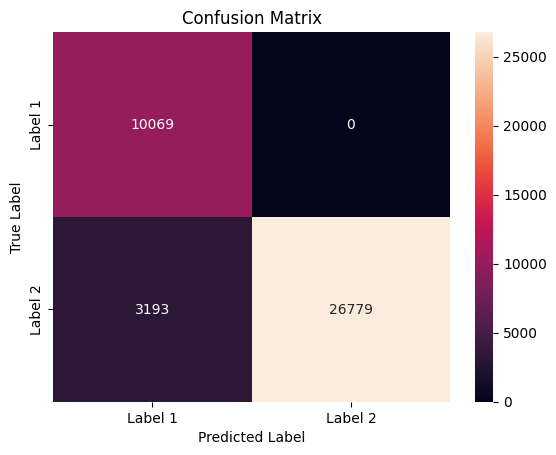

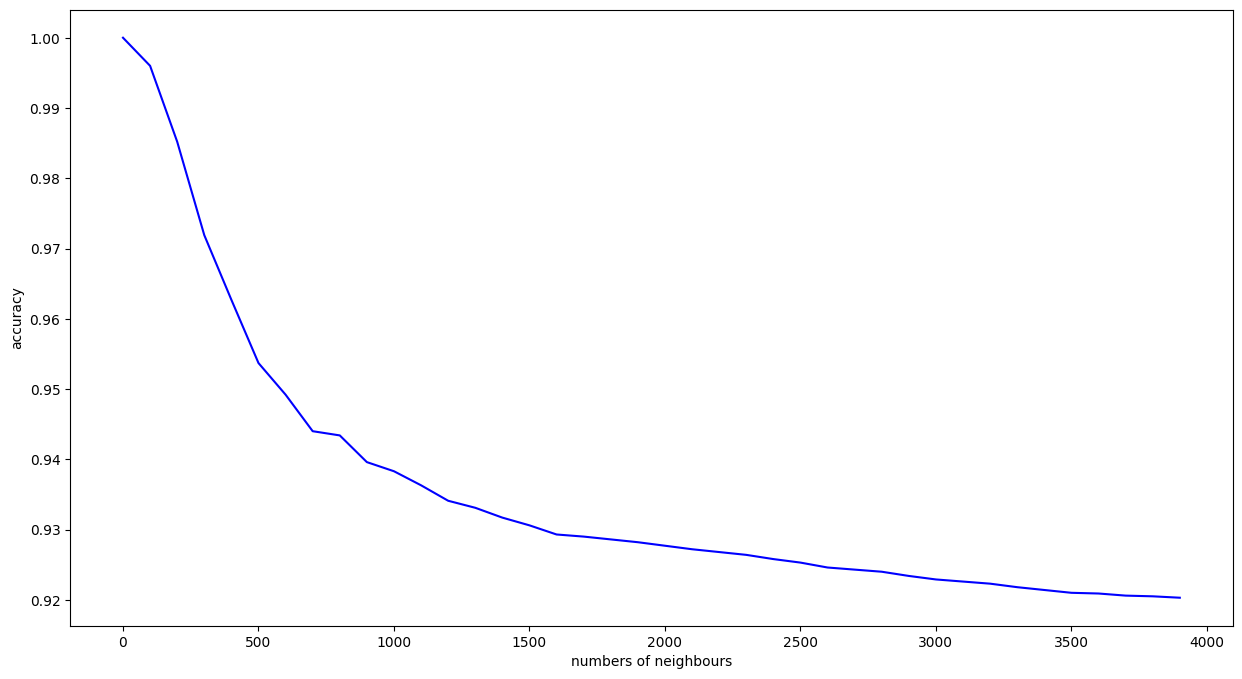

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Label 1', 'Label 2']

sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()    





plt.figure(figsize=(15, 8))
plt.plot(range(1,range_of_neighbour+1,100),acc_list,"b-")
plt.xlabel('numbers of neighbours')
plt.ylabel('accuracy')
plt.show()    




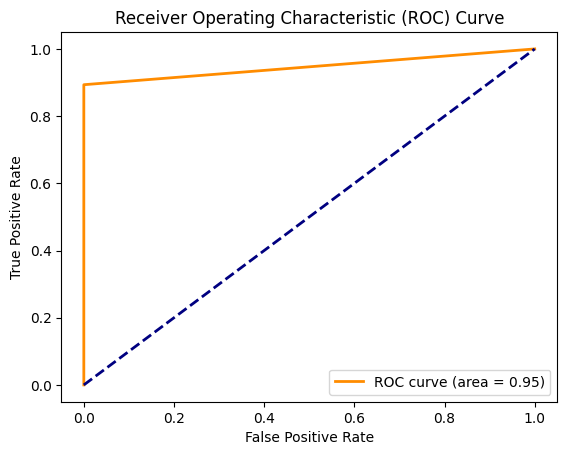

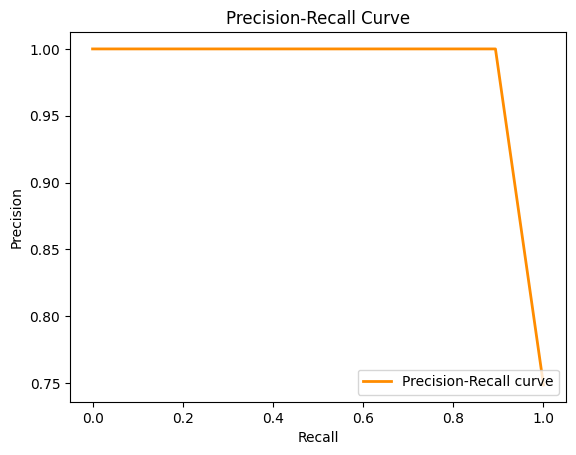

Matthews Correlation Coefficient: 0.8236220675902858


In [15]:
# KNN binary class [0,1]


from sklearn.metrics import roc_curve,auc,precision_recall_curve,matthews_corrcoef
import matplotlib.pyplot as plt

# ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# p-r curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print("Matthews Correlation Coefficient:", mcc)